<h2><u><font color='green'>Global Power Plant Project -</font>Evaluation Project-4


<h2><font color='red'><u>Summary1</u></font></h2>
<h3><font color='maroon'>
1. With this we have successfully built a model to predict the Generating Capacity of the Power plants.<br><br>
2. We initially achieved this with a success rate of about 94.13% or r2 score of 0.9413700262440462.<br><br>
3. Since there was correlation between the features, we did end up getting some overfitting, which was managed by cross validation, where we used Grid search CV method to get the best parameters, and after correction we achieved a true accuracy of 93.2%<br><br>
4. As we look at the above plot, we find there is a best fit line. And from the Best fit line, we can say that, there is more accuracy when the predictions are for smaller plants or capacity, and there is more deviation as it gets more.<br><br>

<br><br>
Now that we have seen this angle, we can look at the the classification angle of finding the Primary fuel.

Text(0, 0.5, 'Predicted Y')

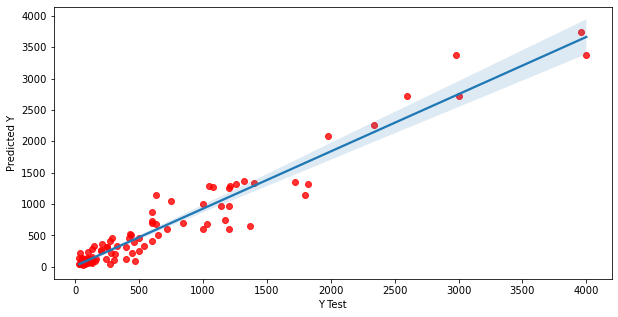

In [43]:
plt.figure(figsize=(10,5))
sns.regplot(x=test_y,y=pred_y2,scatter_kws={'color':'red'})
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

<h2><font color='red'><u>Summary2</u></font></h2>
<h3><font color='maroon'>
1. With this we have successfully built a model to predict the classification of the main fuel used in the Power plants.<br><br>
2. At the model building stage itself,we  achieved a 100% success rate.<br><br>
3. The Columns 'other_fuels1' when label encoded was found to have immense entropy, which resulted in getting the right classification.  <br><br>
4. Although, during data cleanup, we happened to remove data that was associated with solar and nuclear energy.Hence we have to samples for the deduction there.<br><br>
5.From the AUROC we see that we are getting a proper vertical and horizontal line which depicts a 100% accuracy in classification.<br><br>
6. The classification report, has taken into account the missing values for solar and nuclear fuels, hence given a lesser avg accuracy.<br><br>

With this we have successfully completed both the models.
</h3>
    <h4>Find below the Classification report and Decision tree

In [134]:
class_names=['Gas Fuel','Coal Fuel','Hydro Fuel','Solar Fuel','Nuclear Fuel']
print(classification_report(test_y, dtree_predictions, target_names=class_names))

              precision    recall  f1-score   support

    Gas Fuel       1.00      1.00      1.00        25
   Coal Fuel       1.00      1.00      1.00        11
  Hydro Fuel       1.00      1.00      1.00        39
  Solar Fuel       0.00      0.00      0.00         2
Nuclear Fuel       0.00      0.00      0.00         0

    accuracy                           0.97        77
   macro avg       0.60      0.60      0.60        77
weighted avg       0.97      0.97      0.97        77



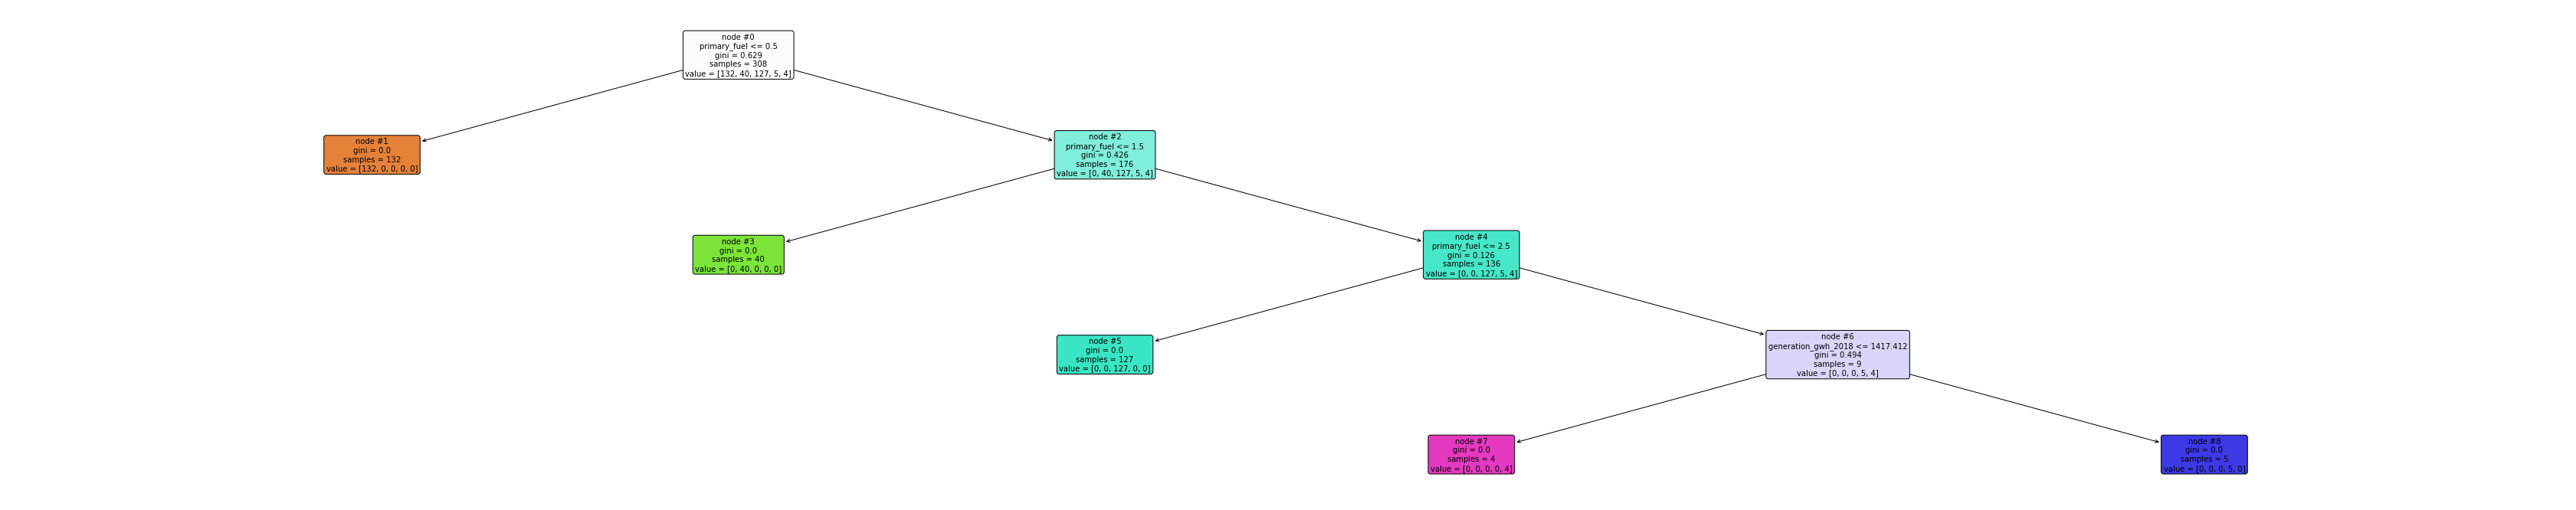

In [98]:
plt.figure(figsize=(60,12))
tree.plot_tree(DCT,feature_names=train_x.columns.values,filled=True,node_ids=True,rounded=True,fontsize=10)
plt.savefig('tree_high_dpi', dpi=100)

<h2><font color='red'><u>Let us begin the Python Implementation.

In [133]:
import pandas as pd
import numpy as np
import matplotlib as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import power_transform,PowerTransformer
from sklearn.preprocessing import power_transform as PT
from scipy.stats import zscore
import plotly.offline as py
import plotly.graph_objs as go
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn import tree

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,cross_val_score
import joblib
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import multilabel_confusion_matrix
import pandas_profiling

import os # accessing directory structure

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv",header=0)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
data.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Inference:
<br>1. From the above dataset, we can see that there are a few redundant column, that we can remove, like country, country_long,other_fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019, estimated_generation_gwh 
<br>2. for ny kind of modeling info such as url is not required.
<br>3. Between Name and gppd_idnr, we can use one. as both are will be redundant. 
<br>4. for the sake of the model we can even remove owner and other identifiers, we can just use.
<br>5. All of data captured has been in 2019(if there is a date),we can even remove, year of capacity data
<br>Before we move further, let us remove the above columns and see what the data looks like

In [7]:
dat=data.drop(['gppd_idnr','estimated_generation_gwh','generation_gwh_2019','generation_gwh_2013','wepp_id','year_of_capacity_data','url','other_fuel3','country','country_long'],axis=1)

In [8]:
df = dat.dropna(subset=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'])
df = df.reset_index(drop=True)
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,NaN,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.74700,886.004428,663.774500,626.239128,Central Electricity Authority
1,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,NaN,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
2,AKRIMOTA LIG,250.0,23.7689,68.6447,Coal,Oil,NaN,2005.0,NaN,Central Electricity Authority,WRI,1153.421000,1208.85200,1175.765000,1147.913000,976.655000,Central Electricity Authority
3,ALIYAR,60.0,10.4547,77.0078,Hydro,NaN,NaN,1970.0,NaN,Central Electricity Authority,WRI,157.558250,152.19520,61.421350,89.629600,48.327150,Central Electricity Authority
4,ALLAIN DUHANGAN,192.0,32.2258,77.2070,Hydro,NaN,NaN,2010.0,NaN,Central Electricity Authority,WRI,674.391100,721.33520,675.724400,679.594950,579.318850,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,VISHNU PRAYAG,400.0,30.5669,79.5468,Hydro,NaN,NaN,2006.0,NaN,Central Electricity Authority,WRI,1806.860300,1204.59675,2031.839750,2150.095500,1922.359900,Central Electricity Authority
387,WANAKBORI,1470.0,22.8725,73.3588,Coal,Oil,NaN,1986.0,NaN,Central Electricity Authority,WRI,6753.870000,5161.53800,3539.630000,7018.217000,7582.300000,Central Electricity Authority
388,WARDHA WARORA(Sai Wardha Power),540.0,20.2727,78.9792,Coal,Oil,NaN,2010.0,NaN,Central Electricity Authority,WRI,1045.820000,1651.15890,1229.480000,999.170000,940.390000,Central Electricity Authority
389,WY.CANAL A -D,62.4,30.3033,77.5684,Hydro,NaN,NaN,1991.0,NaN,Central Electricity Authority,WRI,184.453100,183.00000,204.253600,175.866250,236.491600,Central Electricity Authority


In [10]:
df.nunique()

name                      391
capacity_mw               207
latitude                  366
longitude                 365
primary_fuel                5
other_fuel1                 3
other_fuel2                 1
commissioning_year         66
owner                       0
source                      1
geolocation_source          1
generation_gwh_2014       368
generation_gwh_2015       371
generation_gwh_2016       371
generation_gwh_2017       366
generation_gwh_2018       366
generation_data_source      1
dtype: int64

In [11]:
df.isnull().sum()

name                        0
capacity_mw                 0
latitude                    6
longitude                   6
primary_fuel                0
other_fuel1               223
other_fuel2               390
commissioning_year          0
owner                     391
source                      0
geolocation_source          0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source      0
dtype: int64

<h3><font color='red'>Now we have basically removed all the records showing null in the generation_gwh through the years 2014 to 2018. 
<br>+ We can see that we still have a substantial amount of null data in otherfuels. we can consider reomiving the latitude and logitude nulls as there are only 6, and we will still have a sizable dataset to do our eda and analysys.
<br>+ After removing the rows containing null values in the generation_gwh columns, we find that we have no information about the owner. it doesnt matter as we have the name of the plant do identify.
<br>+ for the other fuels data, we have almost all null data for other fuels2, which we can drop.
<br>+ since there is some data in other_fuel1, we can keep it, after encoding it as 0 and 1.
<br>+ Now let us remove the geolocation data, other fuel2 and owner columns and start our EDA.
<br>+ we also find columns line geolocation source, generation data source, source having same values, hence these can be dropped too.

In [12]:
#Removing rows with null values in location data.
df = df.dropna(subset=['latitude','longitude'])
df = df.reset_index(drop=True)
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,commissioning_year,owner,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,NaN,2004.0,NaN,Central Electricity Authority,WRI,617.789264,843.74700,886.004428,663.774500,626.239128,Central Electricity Authority
1,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,NaN,2015.0,NaN,Central Electricity Authority,WRI,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000,Central Electricity Authority
2,AKRIMOTA LIG,250.0,23.7689,68.6447,Coal,Oil,NaN,2005.0,NaN,Central Electricity Authority,WRI,1153.421000,1208.85200,1175.765000,1147.913000,976.655000,Central Electricity Authority
3,ALIYAR,60.0,10.4547,77.0078,Hydro,NaN,NaN,1970.0,NaN,Central Electricity Authority,WRI,157.558250,152.19520,61.421350,89.629600,48.327150,Central Electricity Authority
4,ALLAIN DUHANGAN,192.0,32.2258,77.2070,Hydro,NaN,NaN,2010.0,NaN,Central Electricity Authority,WRI,674.391100,721.33520,675.724400,679.594950,579.318850,Central Electricity Authority
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380,VISHNU PRAYAG,400.0,30.5669,79.5468,Hydro,NaN,NaN,2006.0,NaN,Central Electricity Authority,WRI,1806.860300,1204.59675,2031.839750,2150.095500,1922.359900,Central Electricity Authority
381,WANAKBORI,1470.0,22.8725,73.3588,Coal,Oil,NaN,1986.0,NaN,Central Electricity Authority,WRI,6753.870000,5161.53800,3539.630000,7018.217000,7582.300000,Central Electricity Authority
382,WARDHA WARORA(Sai Wardha Power),540.0,20.2727,78.9792,Coal,Oil,NaN,2010.0,NaN,Central Electricity Authority,WRI,1045.820000,1651.15890,1229.480000,999.170000,940.390000,Central Electricity Authority
383,WY.CANAL A -D,62.4,30.3033,77.5684,Hydro,NaN,NaN,1991.0,NaN,Central Electricity Authority,WRI,184.453100,183.00000,204.253600,175.866250,236.491600,Central Electricity Authority


In [13]:
Data=df.drop(['source','geolocation_source','generation_data_source','owner','other_fuel2'],axis=1)

In [14]:
Data['other_fuel1']=np.where(Data['other_fuel1'].isnull(), 0, 1)

In [15]:
Data

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,AGARTALA GT,135.0,23.8712,91.3602,Gas,0,2004.0,617.789264,843.74700,886.004428,663.774500,626.239128
1,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,1,2015.0,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000
2,AKRIMOTA LIG,250.0,23.7689,68.6447,Coal,1,2005.0,1153.421000,1208.85200,1175.765000,1147.913000,976.655000
3,ALIYAR,60.0,10.4547,77.0078,Hydro,0,1970.0,157.558250,152.19520,61.421350,89.629600,48.327150
4,ALLAIN DUHANGAN,192.0,32.2258,77.2070,Hydro,0,2010.0,674.391100,721.33520,675.724400,679.594950,579.318850
...,...,...,...,...,...,...,...,...,...,...,...,...
380,VISHNU PRAYAG,400.0,30.5669,79.5468,Hydro,0,2006.0,1806.860300,1204.59675,2031.839750,2150.095500,1922.359900
381,WANAKBORI,1470.0,22.8725,73.3588,Coal,1,1986.0,6753.870000,5161.53800,3539.630000,7018.217000,7582.300000
382,WARDHA WARORA(Sai Wardha Power),540.0,20.2727,78.9792,Coal,1,2010.0,1045.820000,1651.15890,1229.480000,999.170000,940.390000
383,WY.CANAL A -D,62.4,30.3033,77.5684,Hydro,0,1991.0,184.453100,183.00000,204.253600,175.866250,236.491600


In [22]:
count_primary_fuel1=Data[Data['other_fuel1']==1]['primary_fuel']
count_primary_fuel1.nunique()

3

In [23]:
count_primary_fuel0=Data[Data['other_fuel1']==0]['primary_fuel']
count_primary_fuel0.nunique()

4

In [24]:
#checking for null values
Data.isnull().sum()

name                   0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<h3><font color='red'>Now we have Sucessfully performed Preprocessing on our data set, based on logic and basic analysis of the dataset description and the dataset itself.
<br><br> From here we can move on to building a models, one regression and the other classification to find the capacity_mw and Primary_fuel respectively.

<h2><font color='green'><u>1.Let us begin the Regression to find the Power Generation Capacity (capacity_mw)

In [25]:
#Lets begin by removing the 2nd target-primary_fuel
df1=Data.drop(['primary_fuel'],axis=1)
df1

,name,capacity_mw,latitude,longitude,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,AGARTALA GT,135.0,23.8712,91.3602,0,2004.0,617.789264,843.74700,886.004428,663.774500,626.239128
1,AKALTARA TPP,1800.0,21.9603,82.4091,1,2015.0,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000
2,AKRIMOTA LIG,250.0,23.7689,68.6447,1,2005.0,1153.421000,1208.85200,1175.765000,1147.913000,976.655000
3,ALIYAR,60.0,10.4547,77.0078,0,1970.0,157.558250,152.19520,61.421350,89.629600,48.327150
4,ALLAIN DUHANGAN,192.0,32.2258,77.2070,0,2010.0,674.391100,721.33520,675.724400,679.594950,579.318850
...,...,...,...,...,...,...,...,...,...,...,...
380,VISHNU PRAYAG,400.0,30.5669,79.5468,0,2006.0,1806.860300,1204.59675,2031.839750,2150.095500,1922.359900
381,WANAKBORI,1470.0,22.8725,73.3588,1,1986.0,6753.870000,5161.53800,3539.630000,7018.217000,7582.300000
382,WARDHA WARORA(Sai Wardha Power),540.0,20.2727,78.9792,1,2010.0,1045.820000,1651.15890,1229.480000,999.170000,940.390000
383,WY.CANAL A -D,62.4,30.3033,77.5684,0,1991.0,184.453100,183.00000,204.253600,175.866250,236.491600


In [26]:
df1.dtypes

name                    object
capacity_mw            float64
latitude               float64
longitude              float64
other_fuel1              int32
commissioning_year     float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [28]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
capacity_mw,385.0,640.274743,743.287233,26.0000,114.75000,394.00000,1000.0000,4760.0000
latitude,385.0,21.696279,6.750157,8.1691,16.64000,22.32560,26.4875,34.4903
longitude,385.0,79.268877,5.107958,68.6447,76.14180,77.98000,82.2930,95.4080
other_fuel1,385.0,0.428571,0.495516,0.0000,0.00000,0.00000,1.0000,1.0000
commissioning_year,385.0,1996.049351,16.439287,1927.0000,1987.00000,2000.00000,2010.0000,2017.0000
generation_gwh_2014,385.0,2510.685975,4070.550482,0.0000,251.94395,882.66450,3107.2820,28127.0000
generation_gwh_2015,385.0,2636.161828,4332.263829,0.0000,252.50115,909.00000,3378.1200,30539.0000
generation_gwh_2016,385.0,2663.578355,4341.935961,0.0000,210.93005,933.37000,3365.7460,30015.0000
generation_gwh_2017,385.0,2705.235164,4384.682560,0.0000,203.59690,858.73475,3459.6950,35116.0000
generation_gwh_2018,385.0,2797.870947,4539.626068,0.0000,229.87485,940.39000,3319.0540,35136.0000


In [29]:
df1.shape

(385, 11)

<br>1. As we have allready seen, we do not have any null values.
<br>2. The Shape of the dataset is 385 rows X 11 columns. which includes 1 target label and 10 feature data. 
<br>3. Of the Feature data, Latitude and logitude are location data, which we will see if it has any relevance to label<br>apart from this we have 6 continious or numerical data and 1 date time data, which again can be taken out if there is found to be no  relevance to the target label.
<br>4. The Standard deviation seem to be in line with the dataset.
<br>5. there maybe some traces of outliers towards the maxima side of the data.
<br>6. Let us begin our EDA to validate these claims and find more information about our datset before we enter into the model building Phase.

<h3>Explorative Data Analysis(EDA)

array([[<AxesSubplot:title={'center':'capacity_mw'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'other_fuel1'}>],
       [<AxesSubplot:title={'center':'commissioning_year'}>,
        <AxesSubplot:title={'center':'generation_gwh_2014'}>,
        <AxesSubplot:title={'center':'generation_gwh_2015'}>,
        <AxesSubplot:title={'center':'generation_gwh_2016'}>],
       [<AxesSubplot:title={'center':'generation_gwh_2017'}>,
        <AxesSubplot:title={'center':'generation_gwh_2018'}>,
        <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

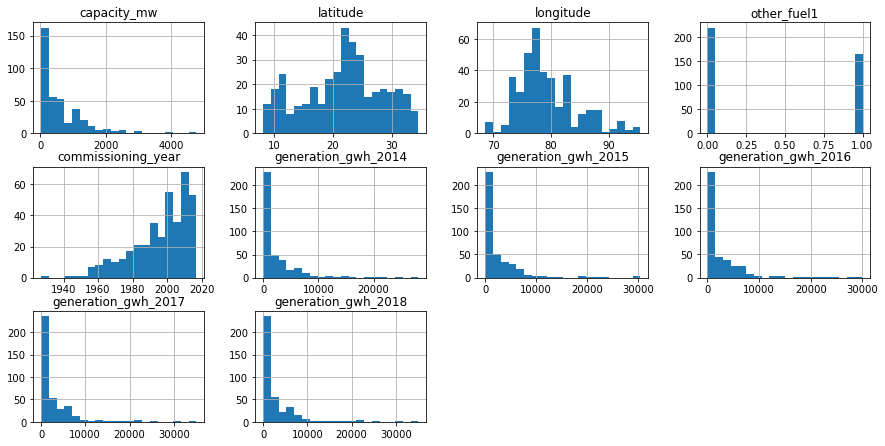

In [30]:
df1.hist(figsize=(15,10),grid=True,layout=(4,4),bins=20)

capacity_mw                AxesSubplot(0.125,0.71587;0.133621x0.16413)
latitude                AxesSubplot(0.285345,0.71587;0.133621x0.16413)
longitude                AxesSubplot(0.44569,0.71587;0.133621x0.16413)
commissioning_year      AxesSubplot(0.606034,0.71587;0.133621x0.16413)
owner                   AxesSubplot(0.766379,0.71587;0.133621x0.16413)
generation_gwh_2014       AxesSubplot(0.125,0.518913;0.133621x0.16413)
generation_gwh_2015    AxesSubplot(0.285345,0.518913;0.133621x0.16413)
generation_gwh_2016     AxesSubplot(0.44569,0.518913;0.133621x0.16413)
generation_gwh_2017    AxesSubplot(0.606034,0.518913;0.133621x0.16413)
generation_gwh_2018    AxesSubplot(0.766379,0.518913;0.133621x0.16413)
dtype: object

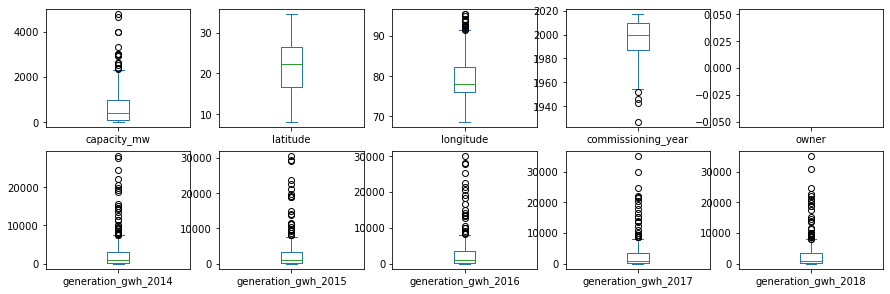

In [31]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(15,10))

As seen above, there are substantial outliers, but it doest make sense to take it out, as they are actual values of the plants over a period of time. and its based on this trend that the model needs to predict the capacity of generation.
<br>We wont be able to use Linear regression for this, as the plots are neither following Normal Distribution and LR itself is very sensitive to outliers.

<h3>Creating functions for visual analysis of the categotical and numerical data columns.

In [62]:
def Cont_plots(dfrme,feature_n,label = "capacity_mw"):
  
    
    fig, ax = plt.subplots(ncols= 2, figsize = (9,4))    

    #distribution plot
    ax[1].set_title("Distribution of "+feature_n)
    ax[1].set_ylabel("Power")
    sns.distplot(a = dfrme[feature_n], ax=ax[1], kde=False)
    
     #boxplot for comparison
    sns.boxplot(x = label, y = feature_n, data=dfrme, ax=ax[0])
    ax[0].set_title("Relationship between " + feature_n + " vs " + label)
    
    plt.show()

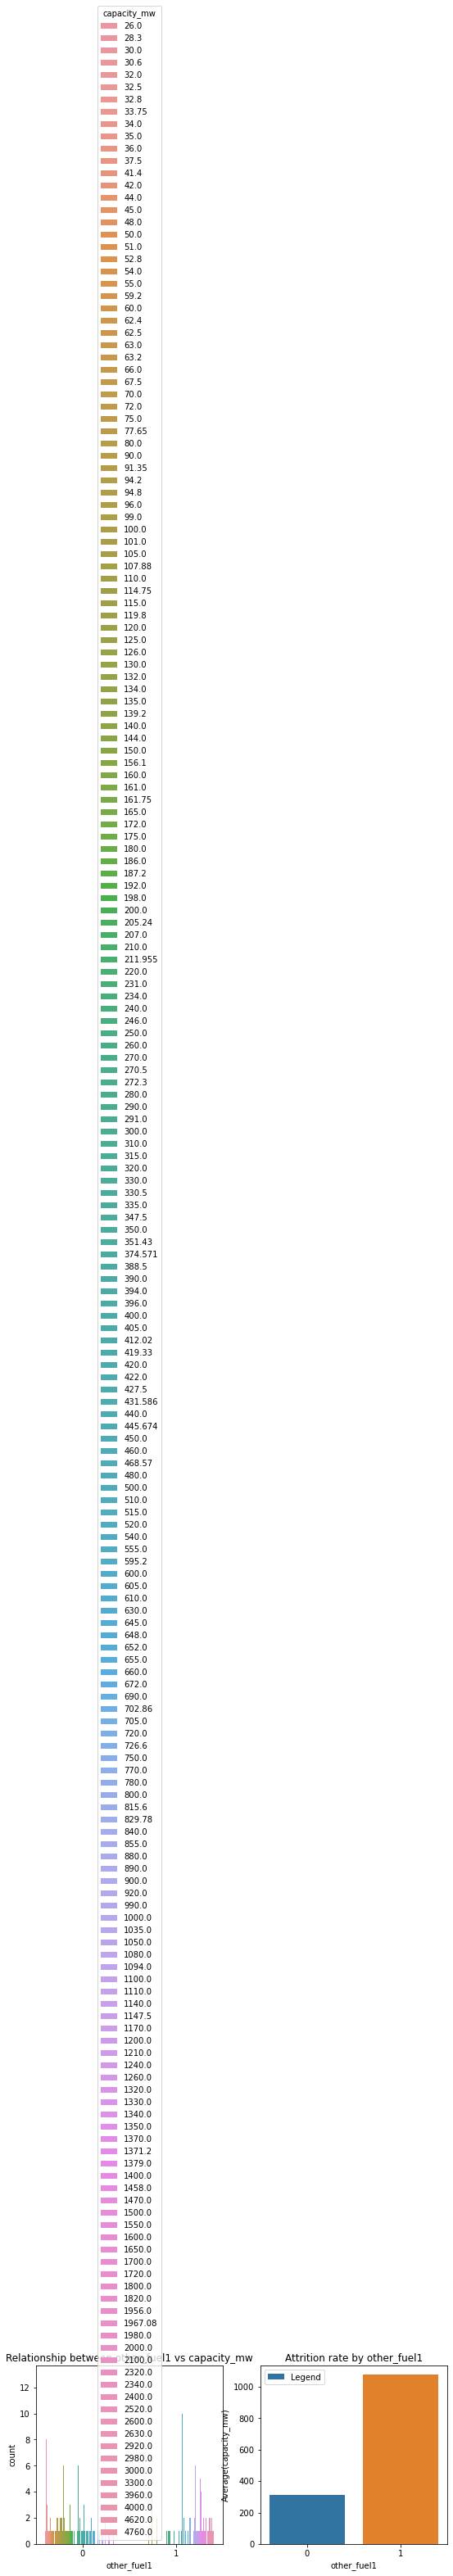

In [58]:
Discrete_plots(df1,feature_c='other_fuel1')

In [87]:
dfn=df1.drop(['name','latitude','longitude','commissioning_year'],axis=1)

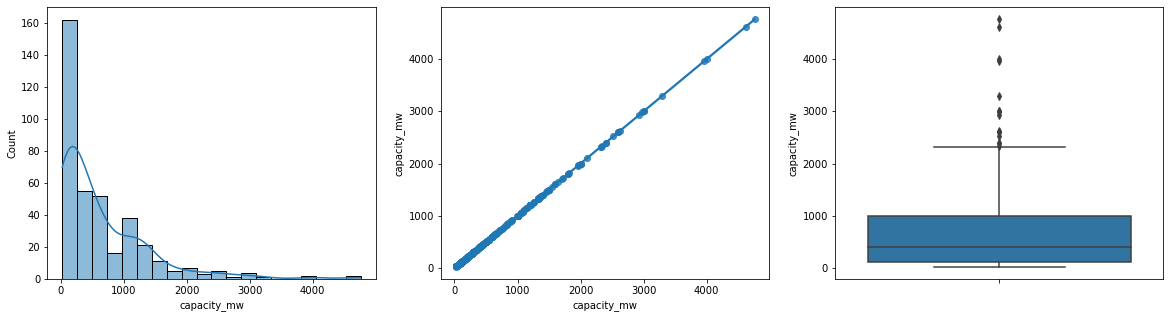

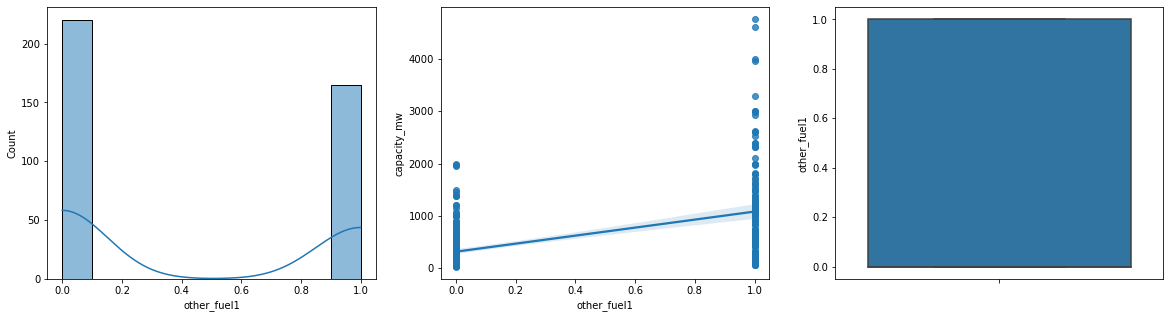

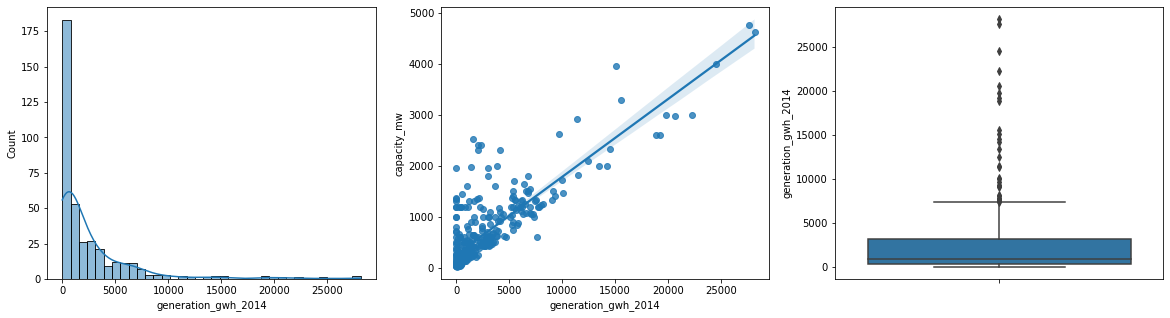

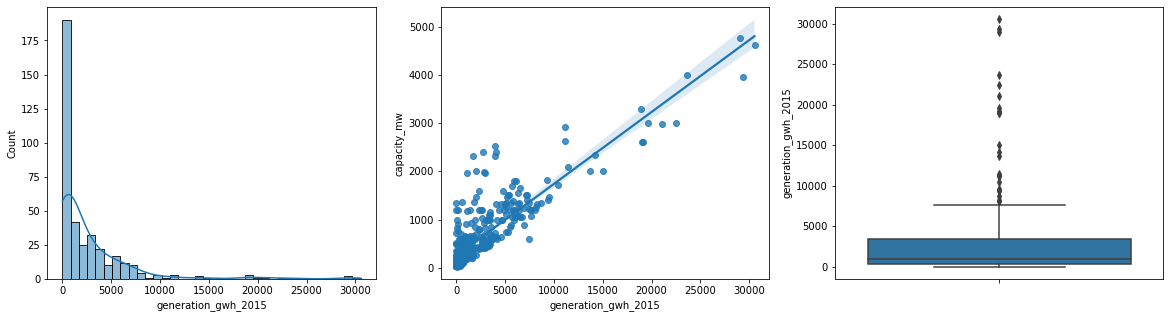

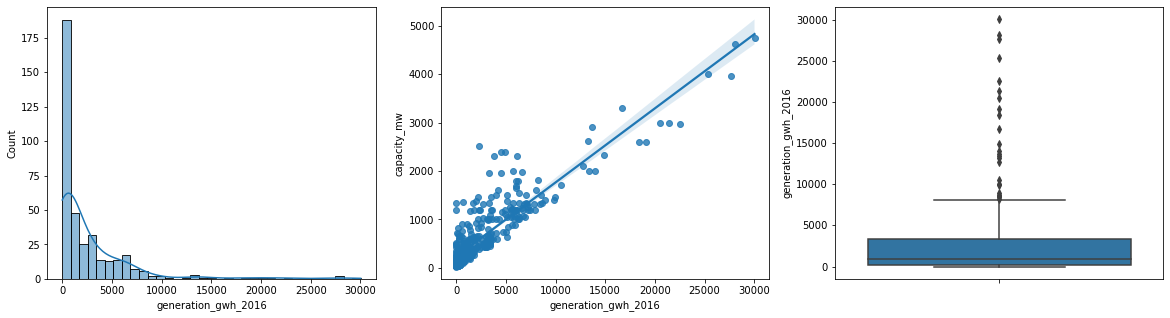

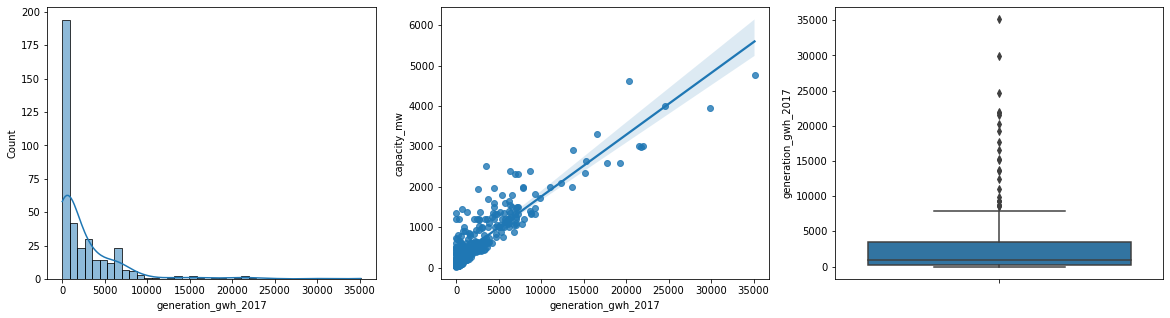

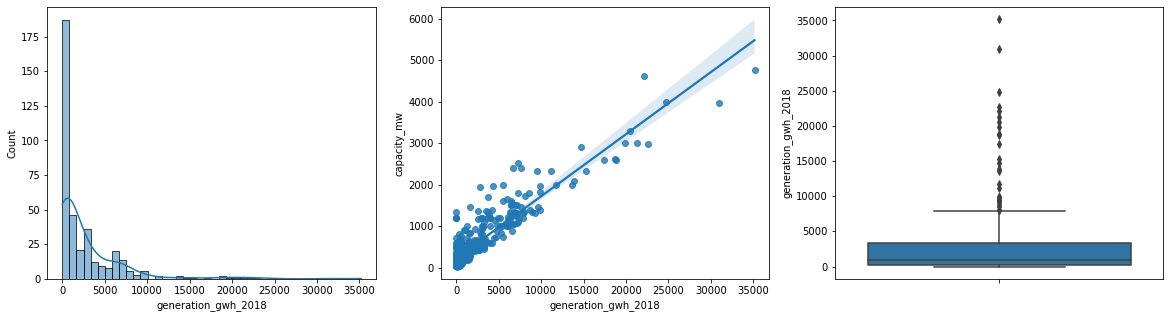

In [89]:
for i in dfn:
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.histplot(x=i,data=dfn,kde=True)
    plt.subplot(1,3,2)
    sns.regplot(x=i,y=dfn.columns[0],data=dfn)
    plt.subplot(1,3,3)
    sns.boxplot(y=i,data=dfn)
    plt.show()

C:\Users\Glenn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



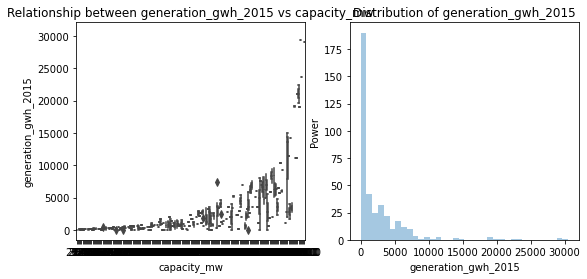

In [64]:
Cont_plots(df1,feature_n='generation_gwh_2015')

C:\Users\Glenn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



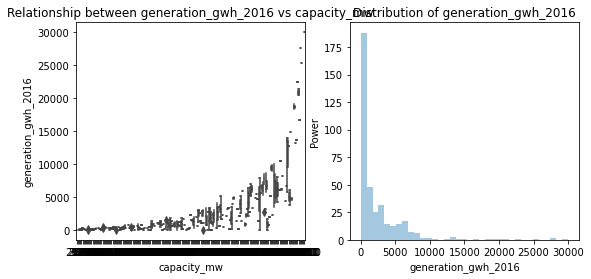

In [65]:
Cont_plots(df1,feature_n='generation_gwh_2016')

C:\Users\Glenn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



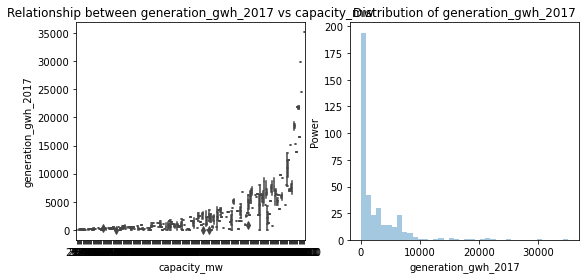

In [66]:
Cont_plots(df1,feature_n='generation_gwh_2017')

C:\Users\Glenn\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



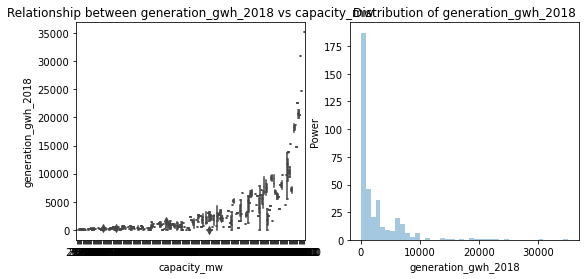

In [67]:
Cont_plots(df1,feature_n='generation_gwh_2018')

<AxesSubplot:>

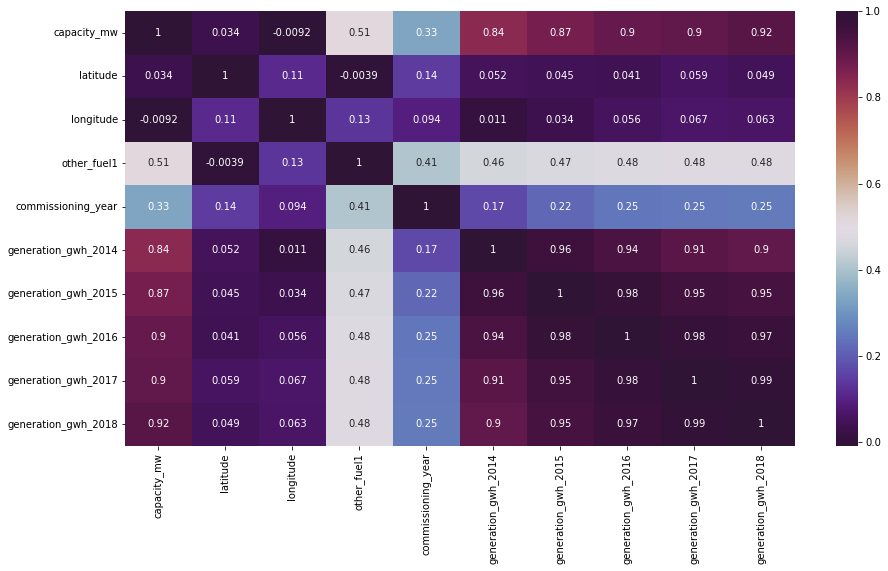

In [32]:
#Heatmap with correlation values
d=df1.corr()
plt.figure(figsize=(15,8))
sns.heatmap(d,cmap='twilight_shifted',annot=True)

In [33]:
#Using Kbest for reference
X=df1.drop(['capacity_mw','name',],axis=1)
Y=df1['capacity_mw']
bestk = SelectKBest(score_func=f_classif,k=9)
fit=bestk.fit(X,Y)
df_scores=pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(9,'Score'))

          Feature_Name      Score
8  generation_gwh_2018  27.568668
7  generation_gwh_2017  26.903744
6  generation_gwh_2016  21.330136
5  generation_gwh_2015  16.013102
4  generation_gwh_2014  12.196307
2          other_fuel1   3.218330
3   commissioning_year   2.046878
1            longitude   1.179817
0             latitude   1.086678


1. From the above K best feature suggestions and the correlation heatmap, we can easily say that all the history of generated power, viz generated_gwh through the years 2014 to 2-18 are highly correlated, hence we can choose to drop a few years data. 
2. we can also remove longitude and lattitude data, as their entropy values are very low.
3. Choosing to drop year 2017 as the entropy value is close to that of 2018. and also location data.

In [34]:
X=df1.drop(['capacity_mw','latitude','longitude','name'],axis=1)
Y=df1['capacity_mw']
sclar = StandardScaler()
sclar.fit_transform(X)

array([[-0.8660254 ,  0.48426644, -0.4656274 , ..., -0.40992935,
        -0.466195  , -0.47899488],
       [ 1.15470054,  1.1542659 ,  0.12910956, ...,  0.82545651,
         0.61209273,  0.9883986 ],
       [ 1.15470054,  0.54517548, -0.33386912, ..., -0.34310717,
        -0.35563546, -0.40170396],
       ...,
       [ 1.15470054,  0.84972069, -0.36033753, ..., -0.33071986,
        -0.38960293, -0.4097029 ],
       [-0.8660254 , -0.30755111, -0.57222232, ..., -0.56714906,
        -0.57761541, -0.56496114],
       [ 1.15470054,  0.66699356,  0.16817467, ...,  0.10607993,
         0.10295047,  0.05333145]])

In [35]:
mod=[LinearRegression(),KNeighborsRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor()]
max_r2score=0
for r_state in range(54,90):
    train_x,test_x,train_y,test_y=train_test_split(X,Y,random_state=r_state,test_size=0.25)
    for i in mod:
        i.fit(train_x,train_y)
        pred_y = i.predict(test_x)
        r2_sc=r2_score(test_y,pred_y)
        print("R2 score corresponding to random state ",r_state,"is",r2_sc)
        if r2_sc>max_r2score:
            max_r2score=r2_sc
            final_state= r_state
            final_model = i
            
            
print("\n\n\n\n\n")
print("Max R2 score corresponding to random state ",final_state,"is",max_r2score,"and best model is ",final_model)

R2 score corresponding to random state  54 is 0.7702585484340698
R2 score corresponding to random state  54 is 0.7688015438181154
R2 score corresponding to random state  54 is 0.7657034296843707
R2 score corresponding to random state  54 is 0.6611134379512
R2 score corresponding to random state  54 is 0.7739395120997937
R2 score corresponding to random state  55 is 0.7647245684555626
R2 score corresponding to random state  55 is 0.7618787813077161
R2 score corresponding to random state  55 is 0.6880381336034926
R2 score corresponding to random state  55 is 0.5392325731864849
R2 score corresponding to random state  55 is 0.7414348462925426
R2 score corresponding to random state  56 is 0.8410514189544765
R2 score corresponding to random state  56 is 0.8674527591797774
R2 score corresponding to random state  56 is 0.8429251454438025
R2 score corresponding to random state  56 is 0.786303432251527
R2 score corresponding to random state  56 is 0.8500118376700813
R2 score corresponding to ran

We have found the best Model to be KNeighborsRegressor with random state at '83' and r2score at 0.9413700262440462  

In [36]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,random_state=83,test_size=0.25)
KNR=KNeighborsRegressor()
KNR.fit(train_x,train_y)
pred_y = KNR.predict(test_x)
r2_sc=r2_score(test_y,pred_y)
print(f'Model r2score is ',r2_sc)
print(f'\n\n The Predicted test label values are',pred_y)

Model r2score is  0.9413700262440462


 The Predicted test label values are [ 116.33    106.13     96.6     946.     3656.      271.991   386.16
 1018.      116.       38.26    467.866   878.      281.1     578.46
  831.      116.2      47.46    128.      114.     1013.8     298.4
 1568.     3104.      628.      236.3     104.606   507.     1101.8
  397.6     356.2     115.8      99.47     63.48   1936.     1266.
  106.       56.9     136.     1270.      424.1     136.27    229.5
   98.24    452.      357.6142  218.     1382.      516.266   582.
  122.87    121.2     297.1      42.2     311.      124.4     648.
  276.66    114.2     239.5    1266.       41.84     40.68    325.1
  278.4      82.8      47.18   1334.       58.58     34.06    672.12
   35.96   2580.      578.       53.18   1394.       73.4     701.
 1174.     1318.      425.2     107.48   3104.     2330.      253.591
  391.1     648.4    1272.      576.      196.54    269.991    92.4
  640.956   128.2      74.66     95.33 

Finding Best Parameters using grid Search CV

In [38]:
parameters={'n_neighbors':range(1,50)}
g_search=GridSearchCV(KNR,parameters)
g_search.fit(train_x,train_y)
n_neighbor=g_search.best_params_
n_neighbor

{'n_neighbors': 4}

In [39]:
KNR2=KNeighborsRegressor(n_neighbors=4)
KNR2.fit(train_x,train_y)


KNeighborsRegressor(n_neighbors=4)

In [40]:
pred_y2=KNR2.predict(test_x)
r2_sc2=r2_score(test_y,pred_y2)
print('R2 Score :{:.1%}'.format(r2_sc2))

R2 Score :93.2%


In [42]:
check=pd.DataFrame({'Actual':test_y,'Predicted':pred_y2})
check.sample(3)

,Actual,Predicted
235,1320.0,1360.0
216,630.0,680.0
376,1260.0,1320.0


Text(0, 0.5, 'Predicted Y')

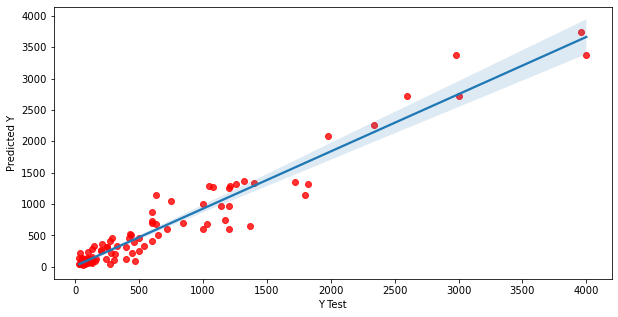

In [43]:
plt.figure(figsize=(10,5))
sns.regplot(x=test_y,y=pred_y2,scatter_kws={'color':'red'})
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')


<h2><font color='red'><u>Summary1</u></font></h2>
<h3><font color='maroon'>
1. With this we have successfully built a model to predict the Generating Capacity of the Power plants.<br><br>
2. We initially achieved this with a success rate of about 94.13% or r2 score of 0.9413700262440462.<br><br>
3. Since there was correlation between the features, we did end up getting some overfitting, which was managed by cross validation, where we used Grid search CV method to get the best parameters, and after correction we achieved a true accuracy of 93.2%<br><br>
4. As we look at the above plot, we find there is a best fit line. And from the Best fit line, we can say that, there is more accuracy when the predictions are for smaller plants or capacity, and there is more deviation as it gets more.<br><br>

<br><br>
Now that we have seen this angle, we can look at the the classification angle of finding the Primary fuel.

<h2><font color='green'><u>2.Let us begin the Classification to find the Primary fuel type used in the Plant.

In [91]:
df2=Data
df2

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,AGARTALA GT,135.0,23.8712,91.3602,Gas,0,2004.0,617.789264,843.74700,886.004428,663.774500,626.239128
1,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,1,2015.0,3035.550000,5916.37000,6243.000000,5385.579736,7279.000000
2,AKRIMOTA LIG,250.0,23.7689,68.6447,Coal,1,2005.0,1153.421000,1208.85200,1175.765000,1147.913000,976.655000
3,ALIYAR,60.0,10.4547,77.0078,Hydro,0,1970.0,157.558250,152.19520,61.421350,89.629600,48.327150
4,ALLAIN DUHANGAN,192.0,32.2258,77.2070,Hydro,0,2010.0,674.391100,721.33520,675.724400,679.594950,579.318850
...,...,...,...,...,...,...,...,...,...,...,...,...
380,VISHNU PRAYAG,400.0,30.5669,79.5468,Hydro,0,2006.0,1806.860300,1204.59675,2031.839750,2150.095500,1922.359900
381,WANAKBORI,1470.0,22.8725,73.3588,Coal,1,1986.0,6753.870000,5161.53800,3539.630000,7018.217000,7582.300000
382,WARDHA WARORA(Sai Wardha Power),540.0,20.2727,78.9792,Coal,1,2010.0,1045.820000,1651.15890,1229.480000,999.170000,940.390000
383,WY.CANAL A -D,62.4,30.3033,77.5684,Hydro,0,1991.0,184.453100,183.00000,204.253600,175.866250,236.491600


1. The EDA and basic analysis is the same as done in subsection-1 for regression.
2. The only difference here is we will be using the plant generation capacity, which will be a continious data feature.
3. Primary fuel will be the target label that has to be encoded.
4. Nominal Data maybe removed.


<AxesSubplot:>

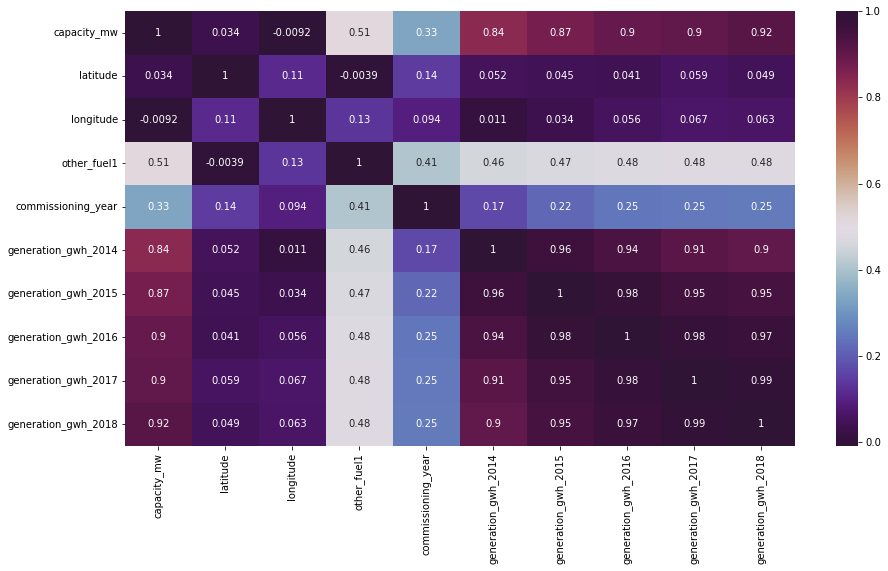

In [92]:
#Heatmap with correlation values
d=df2.corr()
plt.figure(figsize=(15,8))
sns.heatmap(d,cmap='twilight_shifted',annot=True)

In [93]:

LE = LabelEncoder()
  
# Encode labels in column 'species'.
df2['primary_fuel']= LE.fit_transform(df['primary_fuel'])
  
df2['primary_fuel'].unique()

array([1, 0, 2, 4, 3])

In [94]:
#Using Kbest for reference
X2=df2.drop(['name','primary_fuel'],axis=1)
Y2=df2['primary_fuel']
bestk = SelectKBest(score_func=f_classif,k=10)
fit=bestk.fit(X2,Y2)
df_scores=pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X2.columns)

feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=['Feature_Name','Score']
print(feature_scores.nlargest(10,'Score'))

          Feature_Name        Score
3          other_fuel1  1224.319237
0          capacity_mw    40.902217
8  generation_gwh_2017    35.433345
9  generation_gwh_2018    34.972030
7  generation_gwh_2016    34.298129
6  generation_gwh_2015    32.886047
4   commissioning_year    31.713763
5  generation_gwh_2014    31.108185
2            longitude     3.318768
1             latitude     1.719663


In [95]:
X2=df2.drop(['latitude','generation_gwh_2014','generation_gwh_2016','name'],axis=1)
Y2=df2['primary_fuel']
sclar = StandardScaler()
sclar.fit_transform(X2)

array([[-0.68066853,  2.37023423, -0.09104894, ..., -0.41427467,
        -0.466195  , -0.47899488],
       [ 1.56229555,  0.61557067, -1.09258731, ...,  0.75814323,
         0.61209273,  0.9883986 ],
       [-0.52574908, -2.08263303, -1.09258731, ..., -0.32988921,
        -0.35563546, -0.40170396],
       ...,
       [-0.13508267, -0.05678474, -1.09258731, ..., -0.22766034,
        -0.38960293, -0.4097029 ],
       [-0.77846984, -0.33334063,  0.91048943, ..., -0.56699085,
        -0.57761541, -0.56496114],
       [-0.05425514, -0.38091655, -1.09258731, ...,  0.24808902,
         0.10295047,  0.05333145]])

In [96]:
#Function to choose best classification model, its metrics, and random state
mod=[KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
max_acc_score=0

for r_state in range(30,99):
    train_x,test_x,train_y,test_y=train_test_split(X2,Y2,random_state=r_state,test_size=0.2)
    
    for i in mod:
        i.fit(train_x,train_y)
        pred_y = i.predict(test_x)
        acc_score=i.score(test_x,test_y)
        
        print("Accuracy score corresponding to random state ",r_state,"is",acc_score)
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            
            final_state= r_state
            final_model = i
            
            
print("\n\n\n\n\n")
print("Max Accuracy score corresponding to random state ",final_state,"is",max_acc_score,"and best model is ",final_model)

Accuracy score corresponding to random state  30 is 0.6623376623376623
Accuracy score corresponding to random state  30 is 1.0
Accuracy score corresponding to random state  30 is 0.974025974025974
Accuracy score corresponding to random state  31 is 0.7532467532467533
Accuracy score corresponding to random state  31 is 1.0
Accuracy score corresponding to random state  31 is 0.974025974025974
Accuracy score corresponding to random state  32 is 0.6883116883116883
Accuracy score corresponding to random state  32 is 1.0
Accuracy score corresponding to random state  32 is 1.0
Accuracy score corresponding to random state  33 is 0.6623376623376623
Accuracy score corresponding to random state  33 is 1.0
Accuracy score corresponding to random state  33 is 0.961038961038961
Accuracy score corresponding to random state  34 is 0.7272727272727273
Accuracy score corresponding to random state  34 is 1.0
Accuracy score corresponding to random state  34 is 0.987012987012987
Accuracy score corresponding 

In [97]:
train_x,test_x,train_y,test_y=train_test_split(X2,Y2,random_state=30,test_size=0.2)
DCT=DecisionTreeClassifier()
DCT.fit(train_x,train_y)
y_pred = i.predict(test_x)
y_pred


array([0, 0, 2, 0, 2, 0, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 3, 2, 2, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 2, 2, 2, 0, 2, 1, 2, 1,
       1, 0, 1, 2, 3, 0, 0, 0, 2, 2, 1])

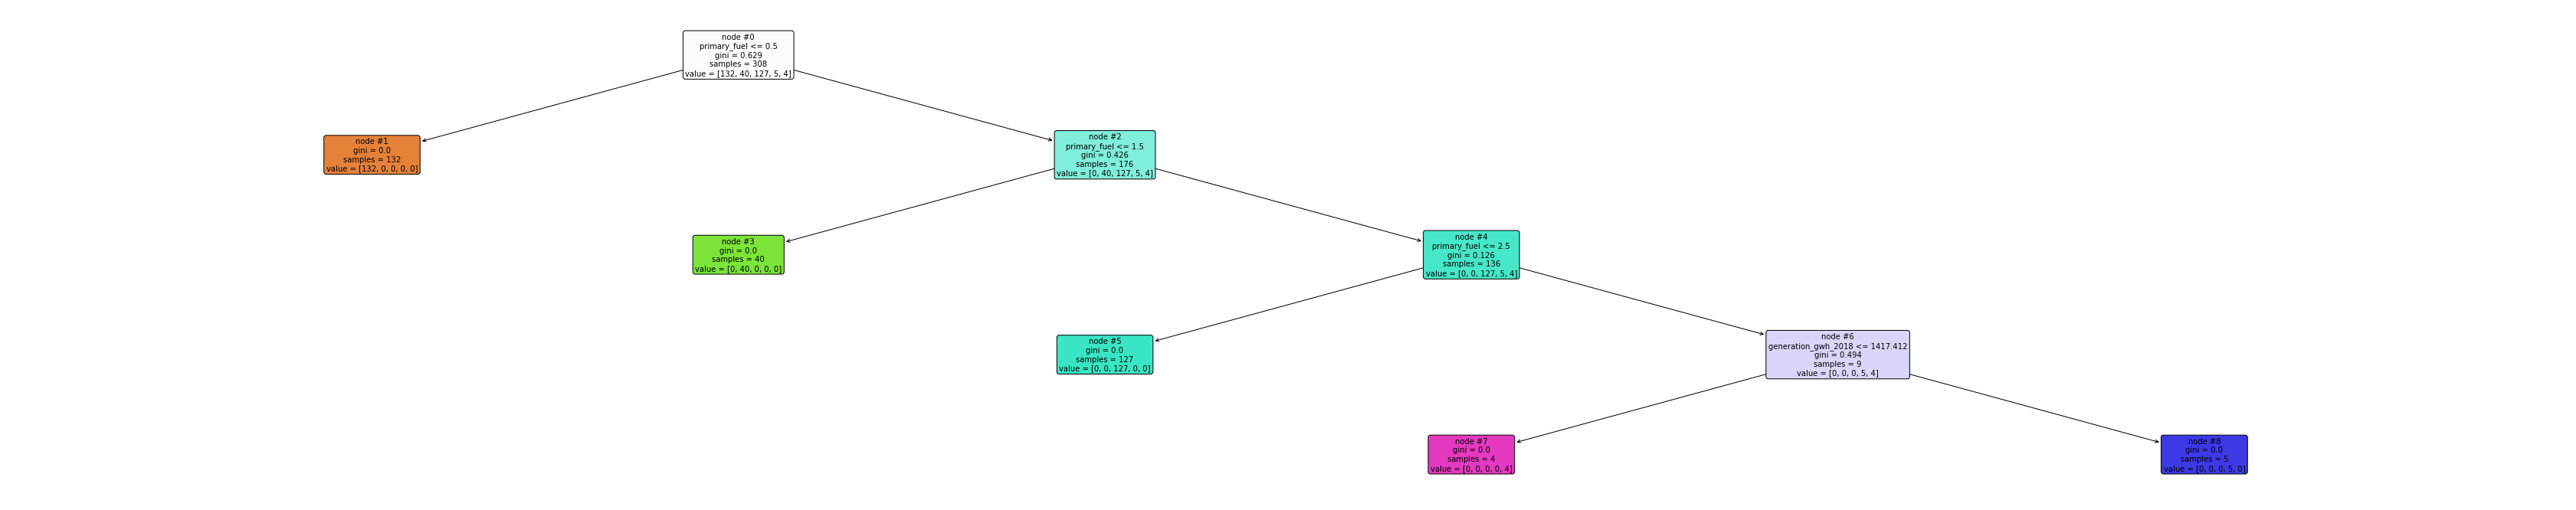

In [98]:
plt.figure(figsize=(60,12))
tree.plot_tree(DCT,feature_names=train_x.columns.values,filled=True,node_ids=True,rounded=True,fontsize=10)
plt.savefig('tree_high_dpi', dpi=100)

In [99]:
pred_probability = pd.DataFrame(p[1] for p in DCT.predict_proba(test_x))
pred_probability.columns = ["predicted_prob"]
pred_probability.index = test_y.index

In [100]:
check2=pd.DataFrame({'Actual':test_y,'Predicted':y_pred})
check2.head(20)

,Actual,Predicted
222,0,0
74,0,0
274,2,2
124,0,0
147,2,2
154,0,0
280,1,1
90,1,1
38,2,2
308,2,2


In [101]:
DTC_test_pred = pd.concat([check2,pred_probability],axis=1)
DTC_test_pred.tail(10)

,Actual,Predicted,predicted_prob
158,0,0,0.0
249,1,1,1.0
53,2,2,0.0
183,3,3,0.0
315,0,0,0.0
87,0,0,0.0
223,0,0,0.0
328,2,2,0.0
21,2,2,0.0
285,1,1,1.0


In [120]:
# creating a confusion matrix
dtree_predictions = DCT.predict(test_x)
  
# creating a confusion matrix
cm = multilabel_confusion_matrix(test_y, dtree_predictions)
cm

array([[[52,  0],
        [ 0, 25]],

       [[66,  0],
        [ 0, 11]],

       [[38,  0],
        [ 0, 39]],

       [[75,  0],
        [ 2,  0]],

       [[75,  2],
        [ 0,  0]]], dtype=int64)

While we need to be very careful as to what metrics to be used for evaluating the model on such a Dataset.
<br>Area under ROC is a very important metric.
<br>Lets see what it says

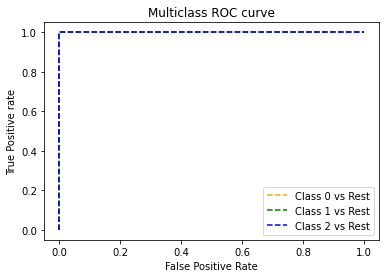

In [113]:
clf = OneVsRestClassifier(DCT)
clf.fit(train_x, train_y)
pred = clf.predict(test_x)
pred_prob = clf.predict_proba(test_x)



# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(test_y, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  b

In [134]:
class_names=['Gas Fuel','Coal Fuel','Hydro Fuel','Solar Fuel','Nuclear Fuel']
print(classification_report(test_y, dtree_predictions, target_names=class_names))

              precision    recall  f1-score   support

    Gas Fuel       1.00      1.00      1.00        25
   Coal Fuel       1.00      1.00      1.00        11
  Hydro Fuel       1.00      1.00      1.00        39
  Solar Fuel       0.00      0.00      0.00         2
Nuclear Fuel       0.00      0.00      0.00         0

    accuracy                           0.97        77
   macro avg       0.60      0.60      0.60        77
weighted avg       0.97      0.97      0.97        77



<h2><font color='red'><u>Summary2</u></font></h2>
<h3><font color='maroon'>
1. With this we have successfully built a model to predict the classification of the main fuel used in the Power plants.<br><br>
2. At the model building stage itself,we  achieved a 100% success rate.<br><br>
3. The Columns 'other_fuels1' when label encoded was found to have immense entropy, which resulted in getting the right classification.  <br><br>
4. Although, during data cleanup, we happened to remove data that was associated with solar and nuclear energy.Hence we have to samples for the deduction there.<br><br>
5.From the AUROC we see that we are getting a proper vertical and horizontal line which depicts a 100% accuracy in classification.<br><br>
6. The classification report, has taken into account the missing values for solar and nuclear fuels, hence given a lesser avg accuracy.<br><br>

With this we have successfully completed both the models.